Dual AGN Model
==============

*Author:* Dr. J. Andrew Casey-Clyde

*Date:* 2024-11-21

Supermassive black holes (SMBHs) can pair as a result of galaxy mergers, eventually forming a SMBH binary (SMBHB) that emits gravitational waves before coalescing. Quasars can be triggered by galaxy mergers, suggesting that connections could be made between the quasar population and the SMBHB population. Indeed, dual active galactic nuclei (AGN) at separations ranging from several hundred parsecs to tens of kiloparsecs are direct progenitors to SMBH binaries. In this notebook we therefore present a model of the dual AGN population which we derive from the SMBHB merger rate.

In [2]:
import stsynphot as stsyn

stsyn.showref()

INFO: 
graphtable: 
comptable : 
thermtable: 
area      : 45238.93416
waveset   : Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True
 [stsynphot.config]


In [1]:
import stsynphot as STS
import matplotlib.pyplot as plt

obsmode = 'acs,wfc1,f555w,mjd#57000' # desired instrument, chip1, filter, and date
# Instantiate an ObservationSpectralElement object which contains the desired
# information (throughput, wavelength converage, etc..) about the specified obsmode
bp_acs = STS.band(obsmode) 

# Now we get the wavelengths associated with the throughput curve.
wavelengths = bp_acs.binset 

# One of the main features of stsynphot is that it is built using astropy.units
# This means that all values are returned with their correct units, so no more
# wondering what the units are of the values you have!
print(wavelengths.unit)

# Finally, compute the throughput values for the filter over the provided wavelength range
throughput = bp_acs(wavelengths) 

# Check to make sure everything looks good
plt.plot(wavelengths.value, throughput.value, label='F555W')

FileNotFoundError: [Errno 2] No such file or directory: ''

In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
%matplotlib inline
sns.set_context("notebook")
sns.set_style('ticks')
sns.set_palette('colorblind')
rcparams = {
    'text.latex.preamble': r'\\usepackage{amsmath}',
    'text.usetex': False,
    'xtick.direction': 'in',
    'xtick.top': True,
    'xtick.minor.visible': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'ytick.minor.visible': True,
    'legend.frameon': False
    # 'axes.labelsize': 18
}
plt.rcParams.update(rcparams)
cs = plt.rcParams['axes.prop_cycle'].by_key()['color']
ls = ['-', '--', ':', '-.', (0, (3, 5, 1, 5, 1, 5))]

FW, FH = plt.rcParams["figure.figsize"]

## Introduction

Merger-triggered accretion onto SMBHs is not necessarily limited to the SMBHB stage of a SMBH pair's evolution.
Indeed, if each of the SMBHs in a post-merger remnant galaxy have significant accretion at large separation they may be observable as a dual active galactic nucleus (AGN).
Several hundred dual AGN have now been observed, with separations ranging from a few hundred to tens of thousands of $\mathrm{pc}$ \citep[e.g.][]{owen_vla_1985,komossa_discovery_2003,rodriguez_compact_2006,bianchi_chandra_2008,green_sdss_2010,comerford_chandra_2011,fabbiano_close_2011,fu_mergers_2011,koss_chandra_2011,shen_type_2011,liu_chandra_2013,fu_radioselected_2015,muller-sanchez_origin_2015,comerford_mergerdriven_2015,comerford_origin_2018,dey_unique_2019,goulding_discovery_2019,bhattacharya_detection_2020,foord_second_2020,kim_dual_2020,reines_new_2020,stemo_catalog_2020,monageng_radio_2021,severgnini_possible_2021,shen_hidden_2021,ward_agns_2021,koss_ugc_2023}.
Importantly, dual AGN are observable progenitors of SMBHBs, and therefore their populations should be linked.
Here we thus derive a method to link the SMBHB population to the dual AGN population.

The rest of this notebook is structured as follows:
In Section 2 we define our sampling grid and load the parameters of our assumed binary merger rate.
In Section 3 we then model the dual AGN population using the SMBHB merger rate and the SMBH pair residence timescale.
In Section 4 we summarize our results.

## Data

In [3]:
import numpy as np
from scipy.stats import norm

# Hyperparameters, such as grid size
N_MESH = np.power(2, 4)
QUANTILES = [
    norm.cdf(-2),
    norm.cdf(-1),
    norm.cdf(0),
    norm.cdf(1),
    norm.cdf(2)
]

# Properties to sample over
log10_mgal = np.linspace(9, 12, num=N_MESH)
log10_mbulge = np.linspace(7, 12, num=N_MESH)
log10_mbhb = np.linspace(7, 10.5, num=N_MESH)
redz = np.linspace(0, 5, num=N_MESH)
q_gal = np.linspace(.25, 1, num=N_MESH)
a_sep = np.geomspace(1e-4, 3e4, num=N_MESH)  # parsecs

In [4]:
import os
from oddagn.config import EXTERNAL_DATA_DIR
from oddagn.dataset import load_binary_merger_rate_params

# with h5py.File(os.path.join(EXTERNAL_DATA_DIR, 'bhb_merger_rate_params.h5'), 'r') as hf:
#     bhb_merger_rate_params = np.array(hf['bhbmf_chains'])

# # bhb_merger_rate_params = bhb_merger_rate_params.T
# bhb_merger_rate_params = bhb_merger_rate_params[:, ::40]  # thin a bit
# print(f"np.shape(bhb_merger_rate_params): {np.shape(bhb_merger_rate_params)}")
bhbmr_params = load_binary_merger_rate_params(os.path.join(EXTERNAL_DATA_DIR, 'bhb_merger_rate_params.h5'), thin=40)

2024-12-19 14:05:17.284 | INFO     | oddagn.config:<module>:13 - PROJ_ROOT path is: /vast/palmer/home.grace/jc4368/oddAGN


In [5]:
import numpy as np

# print the medians of all values
print("gsmf_phi0 = {0:.2f}".format(np.median(bhbmr_params["gsmf_phi0"])))
print("gsmf_phi1 = {0:.2f}".format(np.median(bhbmr_params["gsmf_phi1"])))
print("gsmf_log10_mbreak = {0:.2f}".format(np.median(bhbmr_params["gsmf_log10_mbreak"])))
print("gsmf_alpha0 = {0:.2f}".format(np.median(bhbmr_params["gsmf_alpha0"])))
print("gsmf_alpha1 = {0:.2f}".format(np.median(bhbmr_params["gsmf_alpha1"])))
print("pair_frac_f0 = {0:.2f}".format(np.median(bhbmr_params["pair_frac_f0"])))
print("pair_frac_alpha = {0:.2f}".format(np.median(bhbmr_params["pair_frac_alpha"])))
print("pair_frac_beta = {0:.2f}".format(np.median(bhbmr_params["pair_frac_beta"])))
print("pair_frac_gamma = {0:.2f}".format(np.median(bhbmr_params["pair_frac_gamma"])))
print("merger_time_f0 = {0:.2f}".format(np.median(bhbmr_params["merger_time_tau0"])))
print("merger_time_alpha = {0:.2f}".format(np.median(bhbmr_params["merger_time_alpha"])))
print("merger_time_beta = {0:.2f}".format(np.median(bhbmr_params["merger_time_beta"])))
print("merger_time_gamma = {0:.2f}".format(np.median(bhbmr_params["merger_time_gamma"])))
print("mmbulge_alpha_mbh = {0:.2f}".format(np.median(bhbmr_params["mmbulge_alpha_mbh"])))
print("mmbulge_beta_mbh = {0:.2f}".format(np.median(bhbmr_params["mmbulge_beta_mbh"])))
print("mmbulge_eps_mbh = {0:.2f}".format(np.median(bhbmr_params["mmbulge_eps_mbh"])))

gsmf_phi0 = -2.65
gsmf_phi1 = -0.36
gsmf_log10_mbreak = 11.28
gsmf_alpha0 = -1.18
gsmf_alpha1 = -0.07
pair_frac_f0 = 0.03
pair_frac_alpha = 0.06
pair_frac_beta = 1.26
pair_frac_gamma = 0.00
merger_time_f0 = 2.42
merger_time_alpha = -0.09
merger_time_beta = -2.12
merger_time_gamma = 0.01
mmbulge_alpha_mbh = 1.02
mmbulge_beta_mbh = 8.59
mmbulge_eps_mbh = 0.39


## Modeling

\Cref{eq:diff_num_ch1} describes the differential number of SMBHBs per unit $\mathcal{M}$, $z$, and $\ln f_{\mathrm{GW}}$ in terms of the SMBHB merger rate, $\dot{\phi}_{\mathrm{BHB}}$.
Since Kepler's Third Law, \cref{eq:kepler3}, can be used to directly transform between $f_{\mathrm{GW}}$ and SMBH separation, $a$, this suggests that an approach similar to \cref{eq:diff_num_ch1} can be used to describe SMBH pairs in terms of their separation:
\begin{equation}
    \frac{d^{3}{N_{\mathrm{pair}}}}{d{M_{\mathrm{BH}, 12}} d{z} d{a}} = \int d{q} \frac{d^{3}{\phi_{\mathrm{BHB}}}}{d{t} d{M_{\mathrm{BH}, 12}} d{q}} \frac{d{V_{c}}}{d{z}} \frac{d{t}}{d{a}} \, ,
\end{equation}
where $d{t} / d{a} = \left(d{a} / d{t}\right)^{-1}$ is the differential residence time at each $a$, computed from the rate of change of SMBH separation, $d{a} / d{t}$.
This, in turn, can be computed as a function of SMBH separation by combining \cref{eq:da_dt_df,eq:da_dt_hard,eq:da_dt_gw}:
\begin{equation}
    \frac{d{a}}{d{t}} = \begin{cases}
        \left. \frac{d{a}}{d{t}} \right|_{\mathrm{DF}} \, & \mathrm{if} \ a > a_{h} \, , \\
        \left. \frac{d{a}}{d{t}} \right|_{\mathrm{SH}} + \left. \frac{d{a}}{d{t}} \right|_{\mathrm{GW}} \, & \mathrm{if} \ a < a_{h} \, .
    \end{cases}
\end{equation}
Here, $\left( d{a} / d{t} \right|_{\mathrm{DF}}$ is the rate of change of $a$ in the dynamical friction regime, \cref{eq:da_dt_df}, $\left( d{a} / d{t} \right|_{\mathrm{SH}}$ is the rate of change of $a$ in the stellar hardening regime, \cref{eq:da_dt_hard}, $\left( d{a} / d{t} \right|_{\mathrm{GW}}$ is the rate of change of $a$ in the gravitational wave regime, \cref{eq:da_dt_gw}, and $a_{h}$ is the hard binary separation, \cref{eq:a_hard}.

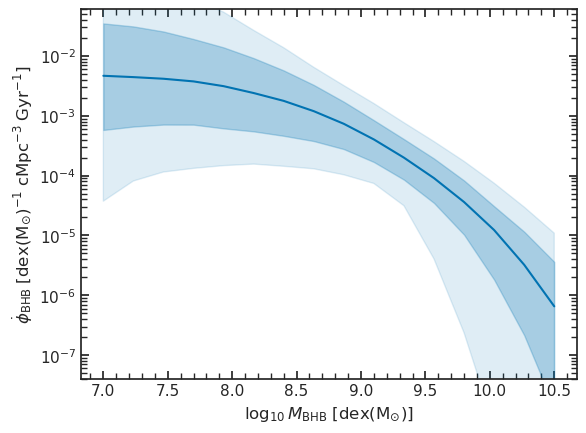

CPU times: user 17.8 s, sys: 4.27 s, total: 22.1 s
Wall time: 22.2 s


In [6]:
%%time

from oddagn.smbhb_models import binary_merger_rate

fig, ax = plt.subplots()

bhmr = binary_merger_rate(
    log10_mbhb,
    log10_mbulge,
    log10_mgal,
    redz,
    q_gal,
    phi0=bhbmr_params["gsmf_phi0"],
    phi1=bhbmr_params["gsmf_phi1"],
    log10_mbreak=bhbmr_params["gsmf_log10_mbreak"],
    alpha0=bhbmr_params["gsmf_alpha0"],
    alpha1=bhbmr_params["gsmf_alpha1"],
    f0=bhbmr_params["pair_frac_f0"],
    alpha_f=bhbmr_params["pair_frac_alpha"],
    beta_f=bhbmr_params["pair_frac_beta"],
    gamma_f=bhbmr_params["pair_frac_gamma"],
    tau0=bhbmr_params["merger_time_tau0"],
    alpha_t=bhbmr_params["merger_time_alpha"],
    beta_t=bhbmr_params["merger_time_beta"],
    gamma_t=bhbmr_params["merger_time_gamma"], 
    alpha_mbh=bhbmr_params["mmbulge_alpha_mbh"], 
    beta_mbh=bhbmr_params["mmbulge_beta_mbh"],
    eps_mbh=bhbmr_params["mmbulge_eps_mbh"]
)  # [P, H, B, M, Z, Q]

bhmr_integ = np.trapezoid(bhmr, q_gal, axis=5)  # [P, H, B, M, Z]
bhmr_integ = np.trapezoid(bhmr_integ, redz, axis=4)  # [P, H, B, M]
bhmr_integ = np.trapezoid(bhmr_integ, log10_mgal, axis=3)  # [P, H, B]
bhmr_integ = np.trapezoid(bhmr_integ, log10_mbulge, axis=2)  # [P, H]
bhmr_integ_quantiles = np.quantile(bhmr_integ, q=QUANTILES, axis=0)  # [H]

ax.plot(log10_mbhb, bhmr_integ_quantiles[2], color=cs[0])
ax.fill_between(
    log10_mbhb,
    bhmr_integ_quantiles[1], 
    bhmr_integ_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax.fill_between(
    log10_mbhb,
    bhmr_integ_quantiles[0], 
    bhmr_integ_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax.set_yscale("log")
ax.set_xlabel(r"$\log_{10} M_{\mathrm{BHB}} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax.set_ylabel(r"$\dot{\phi}_{\mathrm{BHB}} \; [\mathrm{dex}(\mathrm{M}_{\odot})^{-1} \; \mathrm{cMpc}^{-3} \; \mathrm{Gyr}^{-1}]$")
ax.set_ylim(4e-8, 6e-2)

plt.show()

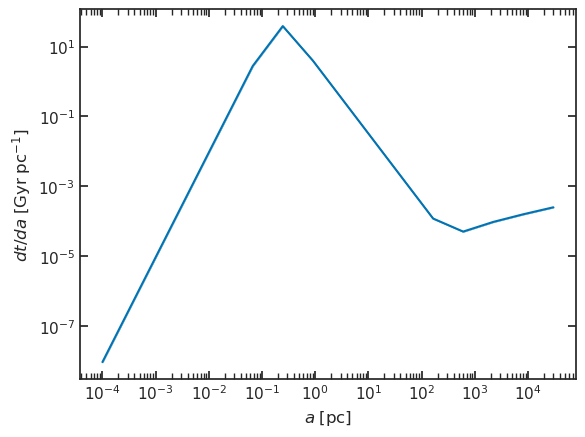

In [7]:
from oddagn.smbh_evolution import dt_da

# plot the separation evolution rate for different SMBH masses and mass ratios
fig, ax = plt.subplots()

# mbhb = np.power(10, log10_mbhb)
# mgal = np.power(10, log10_mgal)
# q_bhb = np.power(q_gal[None, :], bhbmr_params["mmbulge_alpha_mbh"][:, None])

mbhb = np.array([1e9])
mgal = np.array([np.power(10, 9.9)])
q_bhb = np.array([[1]])

dtda = dt_da(
    a_sep[None, None, None, None, :], 
    mgal[None, None, :, None, None], 
    mbhb[None, :, None, None, None], 
    q=q_bhb[:, None, None, :, None],
    gamma=1, 
    H=15
)  # [P, H, M, Q, A]

# choose example parameter configs to plot
# log10_mbh = 8
# log10_mgal = 12
# q_bhb = 1
# dtda_ex1 = dtda[:, 2, 0, 0, :]
dtda_ex1 = dtda[:, 0, 0, 0, :]

dtda_ex1_quantiles = np.quantile(dtda_ex1, q=QUANTILES, axis=0)

ax.plot(a_sep, dtda_ex1_quantiles[2], color=cs[0])
ax.fill_between(
    a_sep,
    dtda_ex1_quantiles[1],
    dtda_ex1_quantiles[3],
    color=cs[0],
    alpha=.25
)
ax.fill_between(
    a_sep,
    dtda_ex1_quantiles[0],
    dtda_ex1_quantiles[4],
    color=cs[0],
    alpha=.125
)

ax.set_xlabel(r"$a \; [\mathrm{pc}]$")
ax.set_xscale("log")
ax.set_ylabel(r"$dt / da \; [\mathrm{Gyr} \; \mathrm{pc}^{-1}]$")
ax.set_yscale("log")
# ax[1].set_ylim(1e-6, 7e1)

plt.show()

In [8]:
from oddagn.config import COSMOLOGY as cosmo

Sampling binary merger rate....
Done!
Marginalizing...
Done!
Sampling residence timescale...


/vast/palmer/home.grace/jc4368/oddAGN/oddagn/smbh_evolution.py:389: RuntimeWarning: divide by zero encountered in divide
  a_hard = r0 / (np.power(10, log10_scaled_mass / (3 - gamma)) - 1)
/vast/palmer/home.grace/jc4368/oddAGN/oddagn/galaxy_properties.py:166: RuntimeWarning: invalid value encountered in divide
  menc = mstellar * np.power(r / (r + r0), 3 - gamma)
/vast/palmer/home.grace/jc4368/oddAGN/oddagn/smbh_evolution.py:184: RuntimeWarning: invalid value encountered in divide
  scale = - G * H * rho_inf / sigma_inf  # km s**-1 * pc**-2


Done!
Computing differential number density...
Done!
Marginalizing over galaxy mass...
Done!
Marginalizing over mass ratio...
Done!
Computing number distribution...
Done!


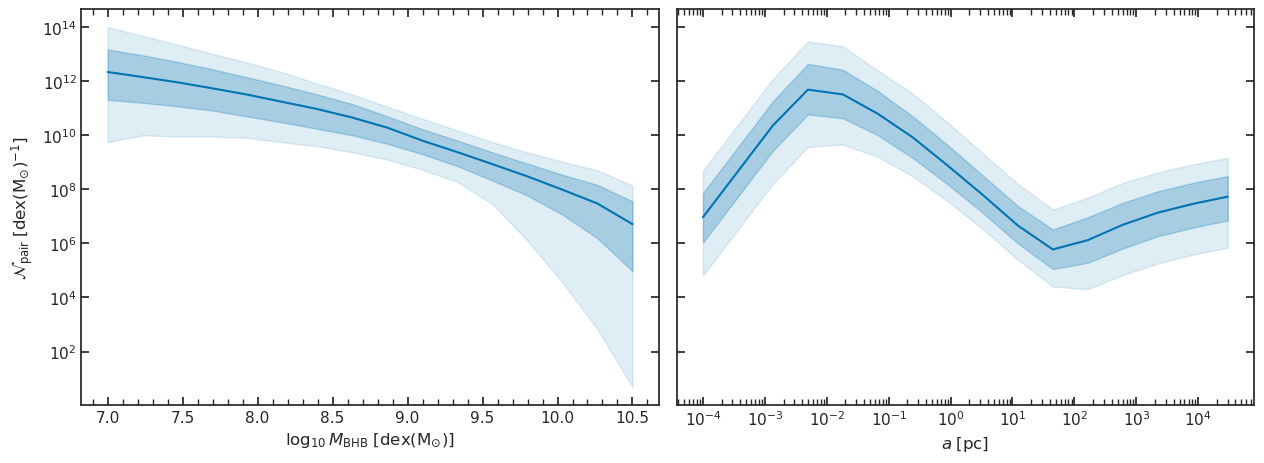

CPU times: user 29.1 s, sys: 9.44 s, total: 38.6 s
Wall time: 38.6 s


In [9]:
%%time

from oddagn.smbhb_models import differential_pair_number

fig, ax = plt.subplots(ncols=2, figsize=[2*FW, FH], sharey=True)

diff_n = differential_pair_number(
    log10_mbhb,
    log10_mbulge,
    log10_mgal,
    redz,
    q_gal,
    a_sep,
    phi0=bhbmr_params["gsmf_phi0"],
    phi1=bhbmr_params["gsmf_phi1"],
    log10_mbreak=bhbmr_params["gsmf_log10_mbreak"],
    alpha0=bhbmr_params["gsmf_alpha0"],
    alpha1=bhbmr_params["gsmf_alpha1"],
    f0=bhbmr_params["pair_frac_f0"],
    alpha_f=bhbmr_params["pair_frac_alpha"],
    beta_f=bhbmr_params["pair_frac_beta"],
    gamma_f=bhbmr_params["pair_frac_gamma"],
    tau0=bhbmr_params["merger_time_tau0"],
    alpha_t=bhbmr_params["merger_time_alpha"],
    beta_t=bhbmr_params["merger_time_beta"],
    gamma_t=bhbmr_params["merger_time_gamma"], 
    alpha_mbh=bhbmr_params["mmbulge_alpha_mbh"], 
    beta_mbh=bhbmr_params["mmbulge_beta_mbh"],
    eps_mbh=bhbmr_params["mmbulge_eps_mbh"]
)  # [P, H, Z, A]

diff_n_integ = np.trapezoid(diff_n, redz, axis=2)  # [P, H, A]

diff_n_integ_log10_mbh = np.trapezoid(diff_n_integ, a_sep, axis=2)  # [P, H]
diff_n_integ_a_sep = np.trapezoid(diff_n_integ, log10_mbhb, axis=1)  # [P, A]

diff_n_integ_log10_mbh_quantiles = np.quantile(diff_n_integ_log10_mbh, q=QUANTILES, axis=0)
diff_n_integ_a_sep_quantiles = np.quantile(diff_n_integ_a_sep, q=QUANTILES, axis=0)

# diff_n_integ_quantiles = np.quantile(diff_n_integ, q=QUANTILES, axis=0)  # [H, A]

ax[0].plot(log10_mbhb, diff_n_integ_log10_mbh_quantiles[2], color=cs[0])
ax[0].fill_between(
    log10_mbhb,
    diff_n_integ_log10_mbh_quantiles[1], 
    diff_n_integ_log10_mbh_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax[0].fill_between(
    log10_mbhb,
    diff_n_integ_log10_mbh_quantiles[0], 
    diff_n_integ_log10_mbh_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax[0].set_yscale("log")
ax[0].set_xlabel(r"$\log_{10} M_{\mathrm{BHB}} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax[0].set_ylabel(r"$\mathcal{N}_{\mathrm{pair}} \; [\mathrm{dex}(\mathrm{M}_{\odot})^{-1}]$")

ax[1].plot(a_sep, diff_n_integ_a_sep_quantiles[2], color=cs[0])
ax[1].fill_between(
    a_sep,
    diff_n_integ_a_sep_quantiles[1], 
    diff_n_integ_a_sep_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax[1].fill_between(
    a_sep,
    diff_n_integ_a_sep_quantiles[0], 
    diff_n_integ_a_sep_quantiles[4], 
    color=cs[0], 
    alpha=.125
)
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$a \; [\mathrm{pc}]$")

plt.tight_layout()
plt.show()

Sampling SMBH pairs....
Sampling binary merger rate....
Done!
Marginalizing...
Done!
Sampling residence timescale...
Done!
Computing differential number density...
Done!
Marginalizing over galaxy mass...
Done!
Marginalizing over mass ratio...
Done!
Computing number distribution...
Done!
Done!


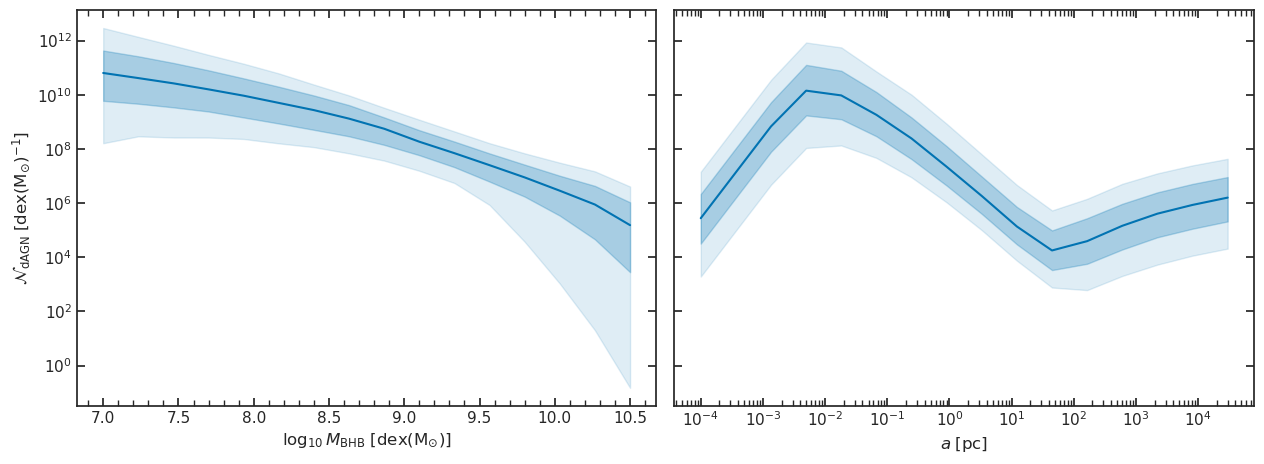

CPU times: user 28.1 s, sys: 9.47 s, total: 37.5 s
Wall time: 37.6 s


In [10]:
%%time

from oddagn.dual_agn_models import differential_dagn_mass

fig, ax = plt.subplots(ncols=2, figsize=[2*FW, FH], sharey=True)

diff_n = differential_dagn_mass(
    log10_mbhb,
    log10_mbulge,
    log10_mgal,
    redz,
    q_gal,
    a_sep,
    phi0=bhbmr_params["gsmf_phi0"],
    phi1=bhbmr_params["gsmf_phi1"],
    log10_mbreak=bhbmr_params["gsmf_log10_mbreak"],
    alpha0=bhbmr_params["gsmf_alpha0"],
    alpha1=bhbmr_params["gsmf_alpha1"],
    f0=bhbmr_params["pair_frac_f0"],
    alpha_f=bhbmr_params["pair_frac_alpha"],
    beta_f=bhbmr_params["pair_frac_beta"],
    gamma_f=bhbmr_params["pair_frac_gamma"],
    tau0=bhbmr_params["merger_time_tau0"],
    alpha_t=bhbmr_params["merger_time_alpha"],
    beta_t=bhbmr_params["merger_time_beta"],
    gamma_t=bhbmr_params["merger_time_gamma"], 
    alpha_mbh=bhbmr_params["mmbulge_alpha_mbh"], 
    beta_mbh=bhbmr_params["mmbulge_beta_mbh"],
    eps_mbh=bhbmr_params["mmbulge_eps_mbh"],
    dagn_frac=.03
)  # [P, H, Z, A]

diff_n_integ = np.trapezoid(diff_n, redz, axis=2)  # [P, H, A]

diff_n_integ_log10_mbh = np.trapezoid(diff_n_integ, a_sep, axis=2)  # [P, H]
diff_n_integ_a_sep = np.trapezoid(diff_n_integ, log10_mbhb, axis=1)  # [P, A]

diff_n_integ_log10_mbh_quantiles = np.quantile(diff_n_integ_log10_mbh, q=QUANTILES, axis=0)
diff_n_integ_a_sep_quantiles = np.quantile(diff_n_integ_a_sep, q=QUANTILES, axis=0)

# diff_n_integ_quantiles = np.quantile(diff_n_integ, q=QUANTILES, axis=0)  # [H, A]

ax[0].plot(log10_mbhb, diff_n_integ_log10_mbh_quantiles[2], color=cs[0])
ax[0].fill_between(
    log10_mbhb,
    diff_n_integ_log10_mbh_quantiles[1], 
    diff_n_integ_log10_mbh_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax[0].fill_between(
    log10_mbhb,
    diff_n_integ_log10_mbh_quantiles[0], 
    diff_n_integ_log10_mbh_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax[0].set_yscale("log")
ax[0].set_xlabel(r"$\log_{10} M_{\mathrm{BHB}} \; [\mathrm{dex}(\mathrm{M}_{\odot})]$")
ax[0].set_ylabel(r"$\mathcal{N}_{\mathrm{dAGN}} \; [\mathrm{dex}(\mathrm{M}_{\odot})^{-1}]$")

ax[1].plot(a_sep, diff_n_integ_a_sep_quantiles[2], color=cs[0])
ax[1].fill_between(
    a_sep,
    diff_n_integ_a_sep_quantiles[1], 
    diff_n_integ_a_sep_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax[1].fill_between(
    a_sep,
    diff_n_integ_a_sep_quantiles[0], 
    diff_n_integ_a_sep_quantiles[4], 
    color=cs[0], 
    alpha=.125
)
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$a \; [\mathrm{pc}]$")

plt.tight_layout()
plt.show()

### Eddington Ratio Distribution Function

We assume the Eddington ratio distribution function from Ananna et al. (2022), which takes the form
$$
P(\log_{10} \lambda_{E}) = \xi^{*} \left[\left(\frac{\lambda_{E}}{\lambda_{E}^{*}}\right)^{\delta_{1}} + \left(\frac{\lambda_{E}}{\lambda_{E}^{*}}\right)^{\delta_{2}}\right]^{-1} \, , \qquad \delta_{2} = \delta_{1} + \epsilon \, , \, \epsilon > 0 \, ,
$$
where $\lambda_{E}$ is the Eddington ratio, $\xi^{*}$ is a normalization factor, $\delta_{1}$ is the low Eddington ratio slope, $\delta_{2}$ is the high Eddington ratio slope, and $\lambda_{E}^{*}$ marks the transition between the low and high slope regimes. While Ananna et al. (2022) constrain $\xi^{*}$ directly, here we will instead use it to normalize between some minimum and maximum Eddington ratios, $\lambda_{E, \min}$ and $\lambda_{E, \max}$, respectively. To do so we take
$$
\xi^{*} = \left\{\frac{1}{\delta_{1} \ln 10} \left[10^{\delta_{1} \left(\log_{10} \lambda_{E}^{*} - \log_{10} \lambda_{E, \min}\right)} \prescript{}{2}{F}_{1}\left(1, \frac{\delta_{1}}{\delta_{1} - \delta_{2}}; \frac{2 \delta_{1} - \delta_{2}}{\delta_{1} - \delta_{2}}; -10^{-\left[\left(\delta_{1} - \delta_{2}\right) \left(\log_{10} \lambda_{E, \min} - \log_{10} \lambda_{E}^{*}\right)\right]}\right) - 10^{\delta_{1} \left(\log_{10} \lambda_{E}^{*} - \log_{10} \lambda_{E, \max}\right)} \prescript{}{2}{F}_{1}\left(1, \frac{\delta_{1}}{\delta_{1} - \delta_{2}}; \frac{2 \delta_{1} - \delta_{2}}{\delta_{1} - \delta_{2}}; -10^{\left[\left(\delta_{1} - \delta_{2}\right) \left(\log_{10} \lambda_{E}^{*} - \log_{10} \lambda_{E, \max}\right)\right]}\right)\right]\right\}^{-1} \, ,
$$
where $\prescript{}{2}{F}_{1}(a, b; c; z)$ is the hypergeometric function. We can simplify this expression to
$$
\xi^{*} = \delta_{1} \ln 10 \left\{\left[\left(\frac{\lambda_{E, \min}}{\lambda_{E}^{*}}\right)^{-\delta_{1}} \prescript{}{2}{F}_{1}\left(1, \frac{\delta_{1}}{\delta_{1} - \delta_{2}}; \frac{2 \delta_{1} - \delta_{2}}{\delta_{1} - \delta_{2}}; -\left(\frac{\lambda_{E, \min}}{\lambda_{E}^{*}}\right)^{\left(\delta_{2} - \delta_{1}\right)}\right) - \left(\frac{\lambda_{E, \max}}{\lambda_{E}^{*}}\right)^{-\delta_{1}} \prescript{}{2}{F}_{1}\left(1, \frac{\delta_{1}}{\delta_{1} - \delta_{2}}; \frac{2 \delta_{1} - \delta_{2}}{\delta_{1} - \delta_{2}}; -\left(\frac{\lambda_{E, \max}}{\lambda_{E}^{*}}\right)^{\left(\delta_{2} - \delta_{1}\right)}\right)\right]\right\}^{-1} \, ,
$$

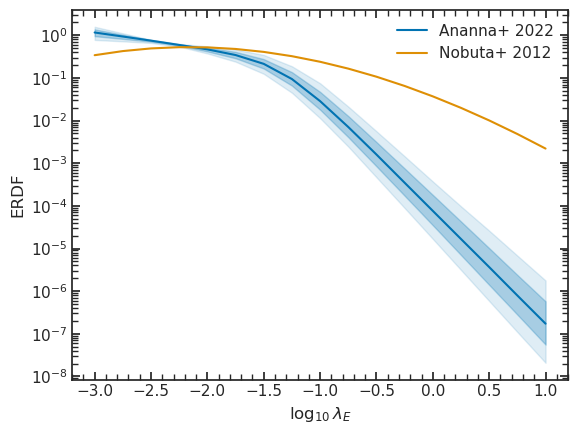

In [11]:
from oddagn.dual_agn_models import erdf_ananna2022, erdf_nobuta2012

plt.figure()

log10_edd_ratio = np.linspace(-3, 1, num=N_MESH+1)

N_SAMPLES = len(bhbmr_params["gsmf_phi0"])
log10_edd_rat_break_a22 = np.random.normal(loc=-1.338, scale=.065, size=N_SAMPLES)
low_slope_a22 = np.random.normal(loc=.38, scale=.12, size=N_SAMPLES)
high_slope_a22 = low_slope_a22 + np.random.normal(loc=2.260, scale=.121, size=N_SAMPLES)

erdf_a22 = erdf_ananna2022(
    log10_edd_ratio,
    log10_edd_rat_break=log10_edd_rat_break_a22,
    low_slope=low_slope_a22,
    high_slope=high_slope_a22
)
erdf_a22_quantiles = np.quantile(erdf_a22, q=QUANTILES, axis=0)

erdf_n12_mass = erdf_nobuta2012(
    log10_edd_ratio[:, None],
    log10_mbhb[None, :]
)
erdf_n12_mass = erdf_n12_mass * diff_n_integ_log10_mbh_quantiles[2] / np.trapezoid(diff_n_integ_log10_mbh_quantiles[2], log10_mbhb)
erdf_n12 = np.trapezoid(erdf_n12_mass, log10_mbhb, axis=-1)

plt.plot(log10_edd_ratio, erdf_a22_quantiles[2], color=cs[0], label="Ananna+ 2022")
plt.fill_between(log10_edd_ratio, erdf_a22_quantiles[1], erdf_a22_quantiles[3], color=cs[0], alpha=.25)
plt.fill_between(log10_edd_ratio, erdf_a22_quantiles[0], erdf_a22_quantiles[4], color=cs[0], alpha=.125)

plt.plot(log10_edd_ratio, erdf_n12, color=cs[1], label="Nobuta+ 2012")
plt.yscale("log")

plt.xlabel(r"$\log_{10} \lambda_{E}$")
plt.ylabel(r"ERDF")

plt.legend()
plt.show()

### Dual AGN Luminosity Function

Sampling SMBH pairs....
Sampling SMBH pairs....
Sampling binary merger rate....
Done!
Marginalizing...
Done!
Sampling residence timescale...
Done!
Computing differential number density...
Done!
Marginalizing over galaxy mass...
Done!
Marginalizing over mass ratio...
Done!
Computing number distribution...
Done!
Done!
Done!


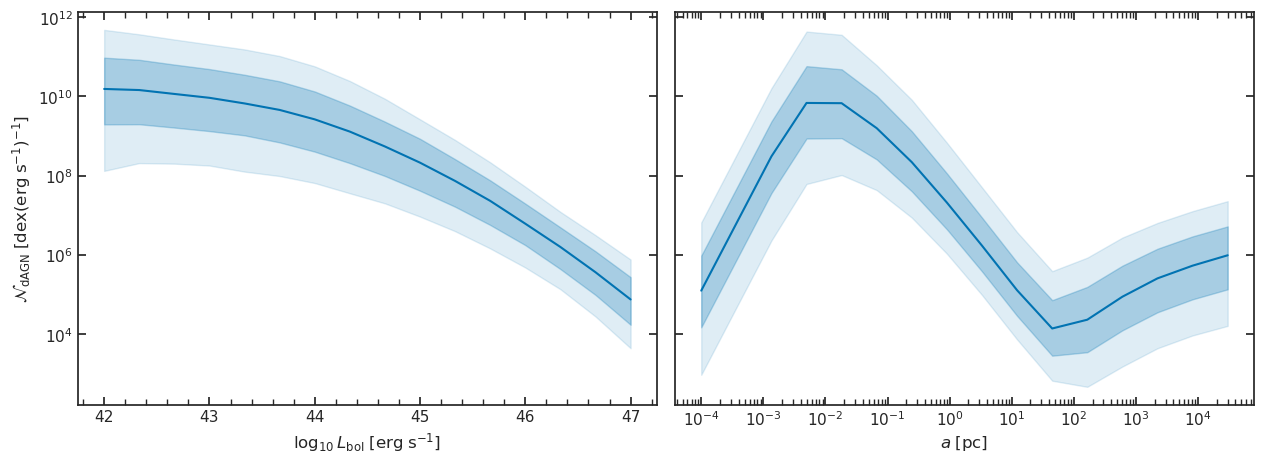

CPU times: user 29.1 s, sys: 9.55 s, total: 38.7 s
Wall time: 38.8 s


In [12]:
%%time

from oddagn.dual_agn_models import differential_dagn_luminosity

fig, ax = plt.subplots(ncols=2, figsize=[2*FW, FH], sharey=True)
log10_lbol = np.linspace(42, 47, num=N_MESH)

diff_n = differential_dagn_luminosity(
    log10_lbol,
    log10_mbhb,
    log10_mbulge,
    log10_mgal,
    redz,
    q_gal,
    a_sep,
    phi0=bhbmr_params["gsmf_phi0"],
    phi1=bhbmr_params["gsmf_phi1"],
    log10_mbreak=bhbmr_params["gsmf_log10_mbreak"],
    alpha0=bhbmr_params["gsmf_alpha0"],
    alpha1=bhbmr_params["gsmf_alpha1"],
    f0=bhbmr_params["pair_frac_f0"],
    alpha_f=bhbmr_params["pair_frac_alpha"],
    beta_f=bhbmr_params["pair_frac_beta"],
    gamma_f=bhbmr_params["pair_frac_gamma"],
    tau0=bhbmr_params["merger_time_tau0"],
    alpha_t=bhbmr_params["merger_time_alpha"],
    beta_t=bhbmr_params["merger_time_beta"],
    gamma_t=bhbmr_params["merger_time_gamma"], 
    alpha_mbh=bhbmr_params["mmbulge_alpha_mbh"], 
    beta_mbh=bhbmr_params["mmbulge_beta_mbh"],
    eps_mbh=bhbmr_params["mmbulge_eps_mbh"],
    dagn_frac=.03,
    erdf=erdf_ananna2022,
    erdf_kwargs=dict(
        log10_edd_rat_break=log10_edd_rat_break_a22,
        low_slope=low_slope_a22,
        high_slope=high_slope_a22,
        log10_edd_rat_min=-4,
    )
)  # [P, L, Z, A]

diff_n_integ = np.trapezoid(diff_n, redz, axis=2)  # [P, H, A]

diff_n_integ_log10_lbol = np.trapezoid(diff_n_integ, a_sep, axis=2)  # [P, H]
diff_n_integ_a_sep = np.trapezoid(diff_n_integ, log10_lbol, axis=1)  # [P, A]

diff_n_integ_log10_lbol_quantiles = np.quantile(diff_n_integ_log10_lbol, q=QUANTILES, axis=0)
diff_n_integ_a_sep_quantiles = np.quantile(diff_n_integ_a_sep, q=QUANTILES, axis=0)

# diff_n_integ_quantiles = np.quantile(diff_n_integ, q=QUANTILES, axis=0)  # [H, A]

ax[0].plot(log10_lbol, diff_n_integ_log10_lbol_quantiles[2], color=cs[0])
ax[0].fill_between(
    log10_lbol,
    diff_n_integ_log10_lbol_quantiles[1], 
    diff_n_integ_log10_lbol_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax[0].fill_between(
    log10_lbol,
    diff_n_integ_log10_lbol_quantiles[0], 
    diff_n_integ_log10_lbol_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax[0].set_yscale("log")
ax[0].set_xlabel(r"$\log_{10} L_{\mathrm{bol}} \; [\mathrm{erg} \; \mathrm{s}^{-1}]$")
ax[0].set_ylabel(r"$\mathcal{N}_{\mathrm{dAGN}} \; [\mathrm{dex}(\mathrm{erg} \; \mathrm{s}^{-1})^{-1}]$")

ax[1].plot(a_sep, diff_n_integ_a_sep_quantiles[2], color=cs[0])
ax[1].fill_between(
    a_sep,
    diff_n_integ_a_sep_quantiles[1], 
    diff_n_integ_a_sep_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax[1].fill_between(
    a_sep,
    diff_n_integ_a_sep_quantiles[0], 
    diff_n_integ_a_sep_quantiles[4], 
    color=cs[0], 
    alpha=.125
)
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$a \; [\mathrm{pc}]$")

plt.tight_layout()
plt.show()

### Dual AGN Flux Function

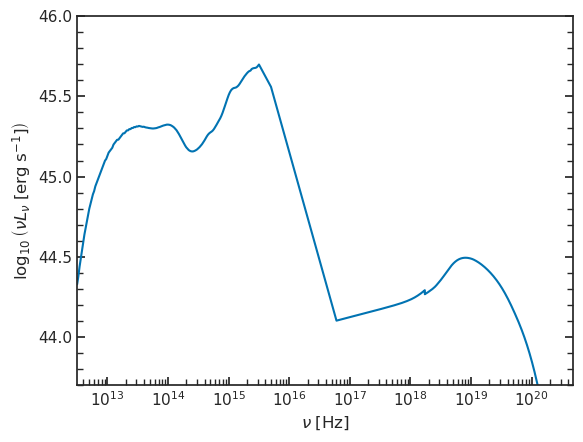

In [13]:
import os
from oddagn.config import EXTERNAL_DATA_DIR
from scipy.interpolate import interp1d
import astropy.units as u

# let's set up the quasar SED as a callable function using scipy's interpolation API
quasar_sed = np.loadtxt(os.path.join(EXTERNAL_DATA_DIR, "quasar_sed_shen_2020.dat"))
wavelength, log10_spec_luminosity = quasar_sed[:, 0], quasar_sed[:, 1]
wavelength = wavelength * u.angstrom
sed_frequencies = wavelength.to(u.Hz, equivalencies=u.spectral()).value

quasar_sed = interp1d(sed_frequencies, log10_spec_luminosity)

fig, ax = plt.subplots()

ax.plot(sed_frequencies, quasar_sed(sed_frequencies))
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False
)

ax.set_xlim(sed_frequencies.min(), sed_frequencies.max())
ax.set_ylim(43.7, 46)
ax.set_xscale("log")
ax.set_xlabel(r"$\nu \; [\mathrm{Hz}]$")
ax.set_ylabel(r"$\log_{10} \left(\nu L_{\nu} \; [\mathrm{erg} \; \mathrm{s}^{-1}]\right)$")

plt.show()

In [98]:
from oddagn.config import COSMOLOGY

def flux_to_luminosity(log10_flux, redz, obs_freqs, log10_quasar_sed, transmission_fn, cosmo=COSMOLOGY):
    # make sure our flux, redshift, and observed frequency components are at least 1D
    log10_flux = np.atleast_1d(log10_flux)
    redz = np.atleast_1d(redz)
    obs_freqs = np.atleast_1d(obs_freqs)
    
    # first we'll compute the "cosmological" term, i.e., the term that doesn't depend on the SED or transmission function
    # compute the constants bit
    const_term = 4 * np.pi
    log10_const_term = np.log10(const_term)

    # compute the luminosity distance term
    lum_dist_cm = cosmo.luminosity_distance(redz).to(u.cm).value
    log10_lum_dist_cm = np.log10(lum_dist_cm)

    # compute the redshift term
    log10_redz_term = np.log10(1 + redz)

    # compute the cosmological term
    log10_cosmo_term = log10_const_term + 2 * log10_lum_dist_cm
    log10_cosmo_term = log10_cosmo_term[None, :] + log10_flux[:, None] - log10_redz_term[None, :]

    # next we'll compute the integral bit, which depends on the transmission function and the quasar SED
    trans_term = transmission_fn(obs_freq)
    log10_sed_term = log10_quasar_sed((1 + redz[:, None]) * obs_freq)
    sed_term = np.power(10, log10_sed_term)

    # integrate
    integrated_term = np.trapezoid(trans_term * sed_term, obs_freq, axis=-1)
    log10_integr_term = np.log10(integrated_term)

    log10_lbol = log10_cosmo_term - log10_integr_term[None, :]
    return log10_lbol

In [ ]:
def differential_dagn_flux(
    log10_lbol,
    log10_mbh,
    log10_mbulge,
    log10_mstellar,
    redz, 
    mratq,
    a_sep,
    phi0, 
    phi1, 
    log10_mbreak, 
    alpha0, 
    alpha1,
    f0, 
    alpha_f, 
    beta_f, 
    gamma_f,
    tau0, 
    alpha_t, 
    beta_t, 
    gamma_t,
    alpha_mbh,
    beta_mbh,
    eps_mbh,
    erdf,
    dagn_frac=.03,
    cosmo=cosmo,
    redz_pair_grid=np.append([0], np.geomspace(1e-4, 100, num=1000)),
    fet0=.587,
    zet0=2.808,
    ket=-3.775,
    mbulge_disp=.2,
    erdf_args=None,
    erdf_kwargs=None,
    cosmo=COSMOLOGY
):
    """Compute the dual agn number density as a function of luminosity.

    Parameters
    ----------
    log10_mbh : float or shape (H,) array_like of float
        Base-10 logarithm of black hole mass
        Units: dex(Msun)
    log10_mbulge : float or shape (B,) array_like of float
        Base-10 logarithm of galaxy bulge mass
        Units: dex(Msun)
    log10_mstellar : float or shape (M,) array_like of float
        Base-10 logarithm of galaxy stellar mass
        Units: dex(Msun
    redz : float or shape (Z,) array_like of float
        Redshift
    mratq : float or shape (Q,) array_like of float
        Galaxy mass ratio
    a_sep : float or array_like of float
        Binary separation, i.e., semi-major axis assuming circular
        orbits
    phi0 : float or shape (P,) array_like of float
        Intercept of the redshift-dependent normalization.
    phi1 : float or shape (P,) array_like of float
        Slope of the redshift-dependent normalization.
    log10_mbreak : float or shape (P,) array_like of float
        Base-10 logarithm of break mass.
        Units: dex(Msun)
    alpha0 : float or shape (P,) array_like of float
        Intercept of the redshift-dependent low-mass slope.
    alpha1 : float or shape (P,) array_like of float
        Slope of the redshift-dependent low-mass slope.
    f0 : float or shape (P,) array_like of float
        Local pair fraction at redshift 0.
    alpha_f : float or shape (P,) array_like of float
        Power-law slope of pair fraction mass dependence.
    beta_f : float or shape (P,) array_like of float
        Power-law slope of pair fraction redshift dependence.
    gamma_f : float or shape (P,) array_like of float
        Power-law slope of pair fraction galaxy mass-ratio dependence.
    tau0 : float or shape (P,) array_like of float
        Local galaxy merger timescale at redshift 0.
    alpha_t : float or shape (P,) array_like of float
        Power-law slope of merger timescale mass dependence.
    beta_t : float or shape (P,) array_like of float
        Power-law slope of merger timescale redshift dependence.
    gamma_t : float or shape (P,) array_like of float
        Power-law slope of merger timescale galaxy mass-ratio dependence.
    alpha_mbh : float or shape (P,) array_like of float
        Power-law slope of M_BH - M_bulge relation.
    beta_mbh : float or shape (P,) array_like of float
        Intercept of M_BH - M_bulge relation.
   eps_mbh : float or shape (P,) array_like of float
        Intrinsic scatter of M_BH - M_bulge relation.

    Returns
    -------
    bmr : shape (P, M, B, Z, Q) array of float
        The bulge merger rate.

    Notes
    -----
    Assumes circular SMBH pairs.

    """
    # compute redshift-dependent bolometric luminosities from flux
    log10_lbol = flux_to_luminosity(
        log10_flux,
        redz,
        quasar_sed,
        transmission_fn,
        cosmo=cosmo
    )
    
    # sample dual AGN luminosity function
    print("Sampling SMBH pairs....")
    diff_n_mass = differential_dagn_luminosity(
        log10_lbol
        log10_mbh,
        log10_mbulge,
        log10_mstellar,
        redz,
        mratq,
        a_sep,
        phi0=phi0,
        phi1=phi1,
        log10_mbreak=log10_mbreak,
        alpha0=alpha0,
        alpha1=alpha1,
        f0=f0,
        alpha_f=alpha_f,
        beta_f=beta_f,
        gamma_f=gamma_f,
        tau0=tau0,
        alpha_t=alpha_t,
        beta_t=beta_t,
        gamma_t=gamma_t, 
        alpha_mbh=alpha_mbh, 
        beta_mbh=beta_mbh,
        eps_mbh=eps_mbh,
        dagn_frac=dagn_frac,
        cosmo=cosmo,
        redz_pair_grid=redz_pair_grid,
        fet0=fet0,
        zet0=zet0,
        ket=ket,
        mbulge_disp=mbulge_disp,
        erdf=erdf,
        erdf_kwargs=erdf_kwargs
    )  # [P, L, Z, A]
    print("Done!")

    # compute erdf
    edd_consts = (4 * np.pi * const.G * const.m_p * const.c / const.sigma_T).to(u.erg / u.s / u.Msun).value
    log10_edd_consts = np.log10(edd_consts)
    log10_edd_rat = log10_lbol[:, None] - log10_mbh[None, :] - log10_edd_consts  # [L, H]
    # erdf_term = erdf(log10_edd_rat, log10_mbh, *erdf_args, **erdf_kwargs)  # [P, L, H]
    if erdf_args is not None:
        if erdf_kwargs is not None:
            erdf_term = erdf(log10_edd_rat, log10_mbh, *erdf_args, **erdf_kwargs)  # [P, L, H]
        else:
            erdf_term = erdf(log10_edd_rat, log10_mbh, *erdf_args)  # [P, L, H]
    elif erdf_kwargs is not None:
        erdf_term = erdf(log10_edd_rat, log10_mbh, **erdf_kwargs)  # [P, L, H]
    else:
        erdf_term = erdf(log10_edd_rat, log10_mbh)  # [P, L, H]

    # compute the mass-luminosity function
    diff_n_mass_lum = diff_n_mass[:, None, :, :, :] * erdf_term[:, :, :, None, None]

    # marginalize over mass
    diff_n_lum = np.trapezoid(diff_n_mass_lum, log10_mbh, axis=2)
    
    return diff_n_lum

NameError: name 'differential_dagn_flux' is not defined

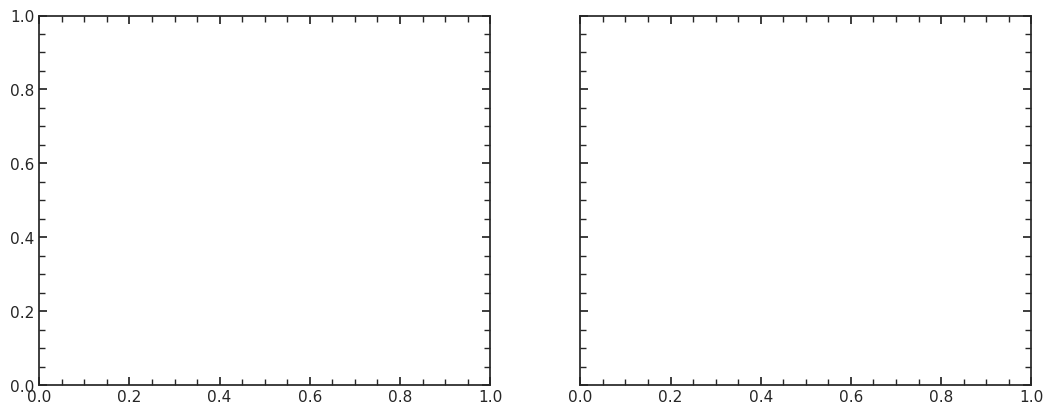

In [94]:
%%time

# from oddagn.dual_agn_models import differential_dagn_flux

fig, ax = plt.subplots(ncols=2, figsize=[2*FW, FH], sharey=True)
log10_lbol = np.linspace(42, 47, num=N_MESH)

diff_n = differential_dagn_flux(
    log10_lbol,
    log10_mbhb,
    log10_mbulge,
    log10_mgal,
    redz,
    q_gal,
    a_sep,
    phi0=bhbmr_params["gsmf_phi0"],
    phi1=bhbmr_params["gsmf_phi1"],
    log10_mbreak=bhbmr_params["gsmf_log10_mbreak"],
    alpha0=bhbmr_params["gsmf_alpha0"],
    alpha1=bhbmr_params["gsmf_alpha1"],
    f0=bhbmr_params["pair_frac_f0"],
    alpha_f=bhbmr_params["pair_frac_alpha"],
    beta_f=bhbmr_params["pair_frac_beta"],
    gamma_f=bhbmr_params["pair_frac_gamma"],
    tau0=bhbmr_params["merger_time_tau0"],
    alpha_t=bhbmr_params["merger_time_alpha"],
    beta_t=bhbmr_params["merger_time_beta"],
    gamma_t=bhbmr_params["merger_time_gamma"], 
    alpha_mbh=bhbmr_params["mmbulge_alpha_mbh"], 
    beta_mbh=bhbmr_params["mmbulge_beta_mbh"],
    eps_mbh=bhbmr_params["mmbulge_eps_mbh"],
    dagn_frac=.03,
    erdf=erdf_ananna2022,
    erdf_kwargs=dict(
        log10_edd_rat_break=log10_edd_rat_break_a22,
        low_slope=low_slope_a22,
        high_slope=high_slope_a22,
        log10_edd_rat_min=-4,
    )
)  # [P, L, Z, A]

diff_n_integ = np.trapezoid(diff_n, redz, axis=2)  # [P, H, A]

diff_n_integ_log10_lbol = np.trapezoid(diff_n_integ, a_sep, axis=2)  # [P, H]
diff_n_integ_a_sep = np.trapezoid(diff_n_integ, log10_lbol, axis=1)  # [P, A]

diff_n_integ_log10_lbol_quantiles = np.quantile(diff_n_integ_log10_lbol, q=QUANTILES, axis=0)
diff_n_integ_a_sep_quantiles = np.quantile(diff_n_integ_a_sep, q=QUANTILES, axis=0)

# diff_n_integ_quantiles = np.quantile(diff_n_integ, q=QUANTILES, axis=0)  # [H, A]

ax[0].plot(log10_lbol, diff_n_integ_log10_lbol_quantiles[2], color=cs[0])
ax[0].fill_between(
    log10_lbol,
    diff_n_integ_log10_lbol_quantiles[1], 
    diff_n_integ_log10_lbol_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax[0].fill_between(
    log10_lbol,
    diff_n_integ_log10_lbol_quantiles[0], 
    diff_n_integ_log10_lbol_quantiles[4], 
    color=cs[0], 
    alpha=.125
)

ax[0].set_yscale("log")
ax[0].set_xlabel(r"$\log_{10} L_{\mathrm{bol}} \; [\mathrm{erg} \; \mathrm{s}^{-1}]$")
ax[0].set_ylabel(r"$\mathcal{N}_{\mathrm{dAGN}} \; [\mathrm{dex}(\mathrm{erg} \; \mathrm{s}^{-1})^{-1}]$")

ax[1].plot(a_sep, diff_n_integ_a_sep_quantiles[2], color=cs[0])
ax[1].fill_between(
    a_sep,
    diff_n_integ_a_sep_quantiles[1], 
    diff_n_integ_a_sep_quantiles[3], 
    color=cs[0], 
    alpha=.25
)
ax[1].fill_between(
    a_sep,
    diff_n_integ_a_sep_quantiles[0], 
    diff_n_integ_a_sep_quantiles[4], 
    color=cs[0], 
    alpha=.125
)
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$a \; [\mathrm{pc}]$")

plt.tight_layout()
plt.show()